# Hypergraph information

In [5]:
import sys

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from tqdm import tqdm

sys.path.append("../src/")

import xgi
from reducibility_hg import *

sb.set_theme(style="ticks", context="paper")


In [6]:
results_dir = "../results/"
out_dir  = f"{results_dir}datasets/"

## hypergraph datasets

In [7]:
data_names = [
    "email-enron",
    "email-eu",
    "hospital-lyon",
    "contact-high-school",
    "contact-primary-school",
    "tags-ask-ubuntu",
    "congress-bills",
    #"disgenenet",
    #"diseasome",
    #"ndc-substances",
    #"coauth-mag-geology",
    #"coauth-mag-history",
]

HGs = {}
for name in tqdm(data_names): 
    HGs[name] = xgi.load_xgi_data(name, max_order=None, cache=True)


100%|█████████████████████████████████████████████| 7/7 [00:07<00:00,  1.07s/it]


In [8]:
pacs = 2
name = f"PACS{pacs}"
H0 = xgi.read_json(f"../data/{name}.json")
print(H0)
orders = np.array(xgi.unique_edge_sizes(H0)) - 1
weights = np.ones(len(orders))

Unnamed Hypergraph with 55549 nodes and 33959 hyperedges


### Compute info

In [39]:
i = 0 # choose dataset here
name = data_names[i]
print(name)
H0 = HGs[name]
print(H0)
print("max order:", xgi.max_edge_order(H0))
H0.cleanup(isolates=True)
print(H0)

orders = np.array(xgi.unique_edge_sizes(H0)) - 1
weights = np.ones(len(orders))

email-enron
Hypergraph named email-Enron with 148 nodes and 10885 hyperedges
max order: 36
Hypergraph named email-Enron with 148 nodes and 1459 hyperedges


In [40]:
tau_c = find_charact_tau(H0, orders, weights)
tau_c 

0.0010842529430735446

### Multiple taus

In [41]:
taus = [0.01*tau_c, tau_c, 100*tau_c] #[0.0001, 0.001, 1]

Ds_H = []
lZs_H = []
Qs_H = []

for tau in tqdm(taus):
    print(tau)
    Ds_Hi, lZs_Hi, orders = compute_information(H0, tau)
    Ds_H.append(Ds_Hi)
    lZs_H.append(lZs_Hi)
    Qs_H.append(lZs_Hi + Ds_Hi)

  0%|                                                     | 0/3 [00:00<?, ?it/s]

1.0842529430735445e-05


 33%|███████████████                              | 1/3 [00:25<00:50, 25.07s/it]

0.0010842529430735446
logm result may be inaccurate, approximate err = 2.8644206850208994e-13


 67%|██████████████████████████████               | 2/3 [00:49<00:24, 24.88s/it]

0.10842529430735445


100%|█████████████████████████████████████████████| 3/3 [01:19<00:00, 26.47s/it]


In [42]:
np.savez(
    f"{out_dir}taus_{data_names}_taus_{taus}.npz",
    Ds_H=Ds_H,
    lZs_H=lZs_H,
    Qs_H=Qs_H,
    taus=taus,
    orders=orders,
    tau_c=tau_c
)

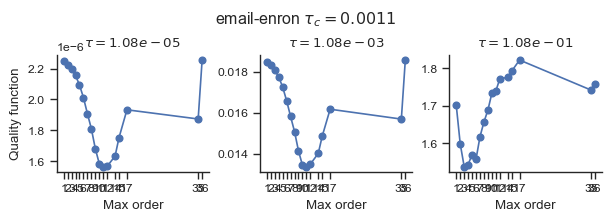

In [43]:
fig, axs = plt.subplots(
    1, len(taus), figsize=(2 * len(taus), 2.1), constrained_layout=True
)

for i, tau in enumerate(taus):

    
    axs[i].plot(orders, lZs_H[i] + Ds_H[i], "o-", label=f"tau={tau}")
    
        #axs[i].axvline(d_shuffles[j], ls="--", c=f"C{j+1}", zorder=-2, alpha=0.8)

    axs[i].set_title(rf"$\tau = {tau:.2e}$", weight="bold")
    axs[i].set_xlabel("Max order")
    axs[i].set_xticks(orders)

axs[0].set_ylabel("Quality function")
#axs[-1].legend(loc="center left", bbox_to_anchor=(1, 0.5))

sb.despine()

fig.suptitle(rf"{name} $\tau_c={tau_c:.4f}$")

fig_name = f"info_{name}_tau_c_{tau_c}" #lambda2_HG_SC_N_{N}_ps_{ps}_nrep_{n_repetitions}"

#plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")